In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!rm trim_*

In [3]:
!for i in *.csv; do echo $i; cat $i | tail -n +10 > trim_$i; done

Anlong-103_YN2013.csv
F46_Rf4092.csv
Jiyuan_84_HeB2013.csv
n40_n47.csv
n50_n49.csv
Rp3_Rm1.csv
Rs4081_YN2018D.csv
Rs9401_Rs7327.csv


In [4]:
triplets = pd.DataFrame([
    ['n50','n49','n48'],
    ['n40','n47','n50'],
    ['Rp3','Rm1','SC2018'],
    ['F46','Rf4092','Rs4231'],
    ['Rs4081','YN2018D','YN2018C'],
    ['Rs9401','Rs7327','Anlong-103'],
    ['Anlong-103','YN2013','Rs4084'],
    ['Jiyuan_84','HeB2013','16BO133']
],columns=['donor','recipient','rec_sis'])

In [5]:
triplets

,donor,recipient,rec_sis
0,n50,n49,n48
1,n40,n47,n50
2,Rp3,Rm1,SC2018
3,F46,Rf4092,Rs4231
4,Rs4081,YN2018D,YN2018C
5,Rs9401,Rs7327,Anlong-103
6,Anlong-103,YN2013,Rs4084
7,Jiyuan_84,HeB2013,16BO133


In [6]:
def read_fi(donor, recip, rec_sis):
    file = f'trim_{donor}_{recip}.csv'
    df = pd.read_csv(file)
    if 'donor' in df.columns:
        df = df.rename({'CenterPos': 'Position', 'donor': donor, 'recipient sister': rec_sis}, axis=1)
    else:
        df.columns=['Position',donor,rec_sis]
    return df

In [7]:
dfs = {(don, rec, rec_sis): read_fi(don, rec, rec_sis) for _, (don, rec, rec_sis) in triplets.iterrows()}

In [8]:
sns.set(font_scale=2,style='whitegrid')

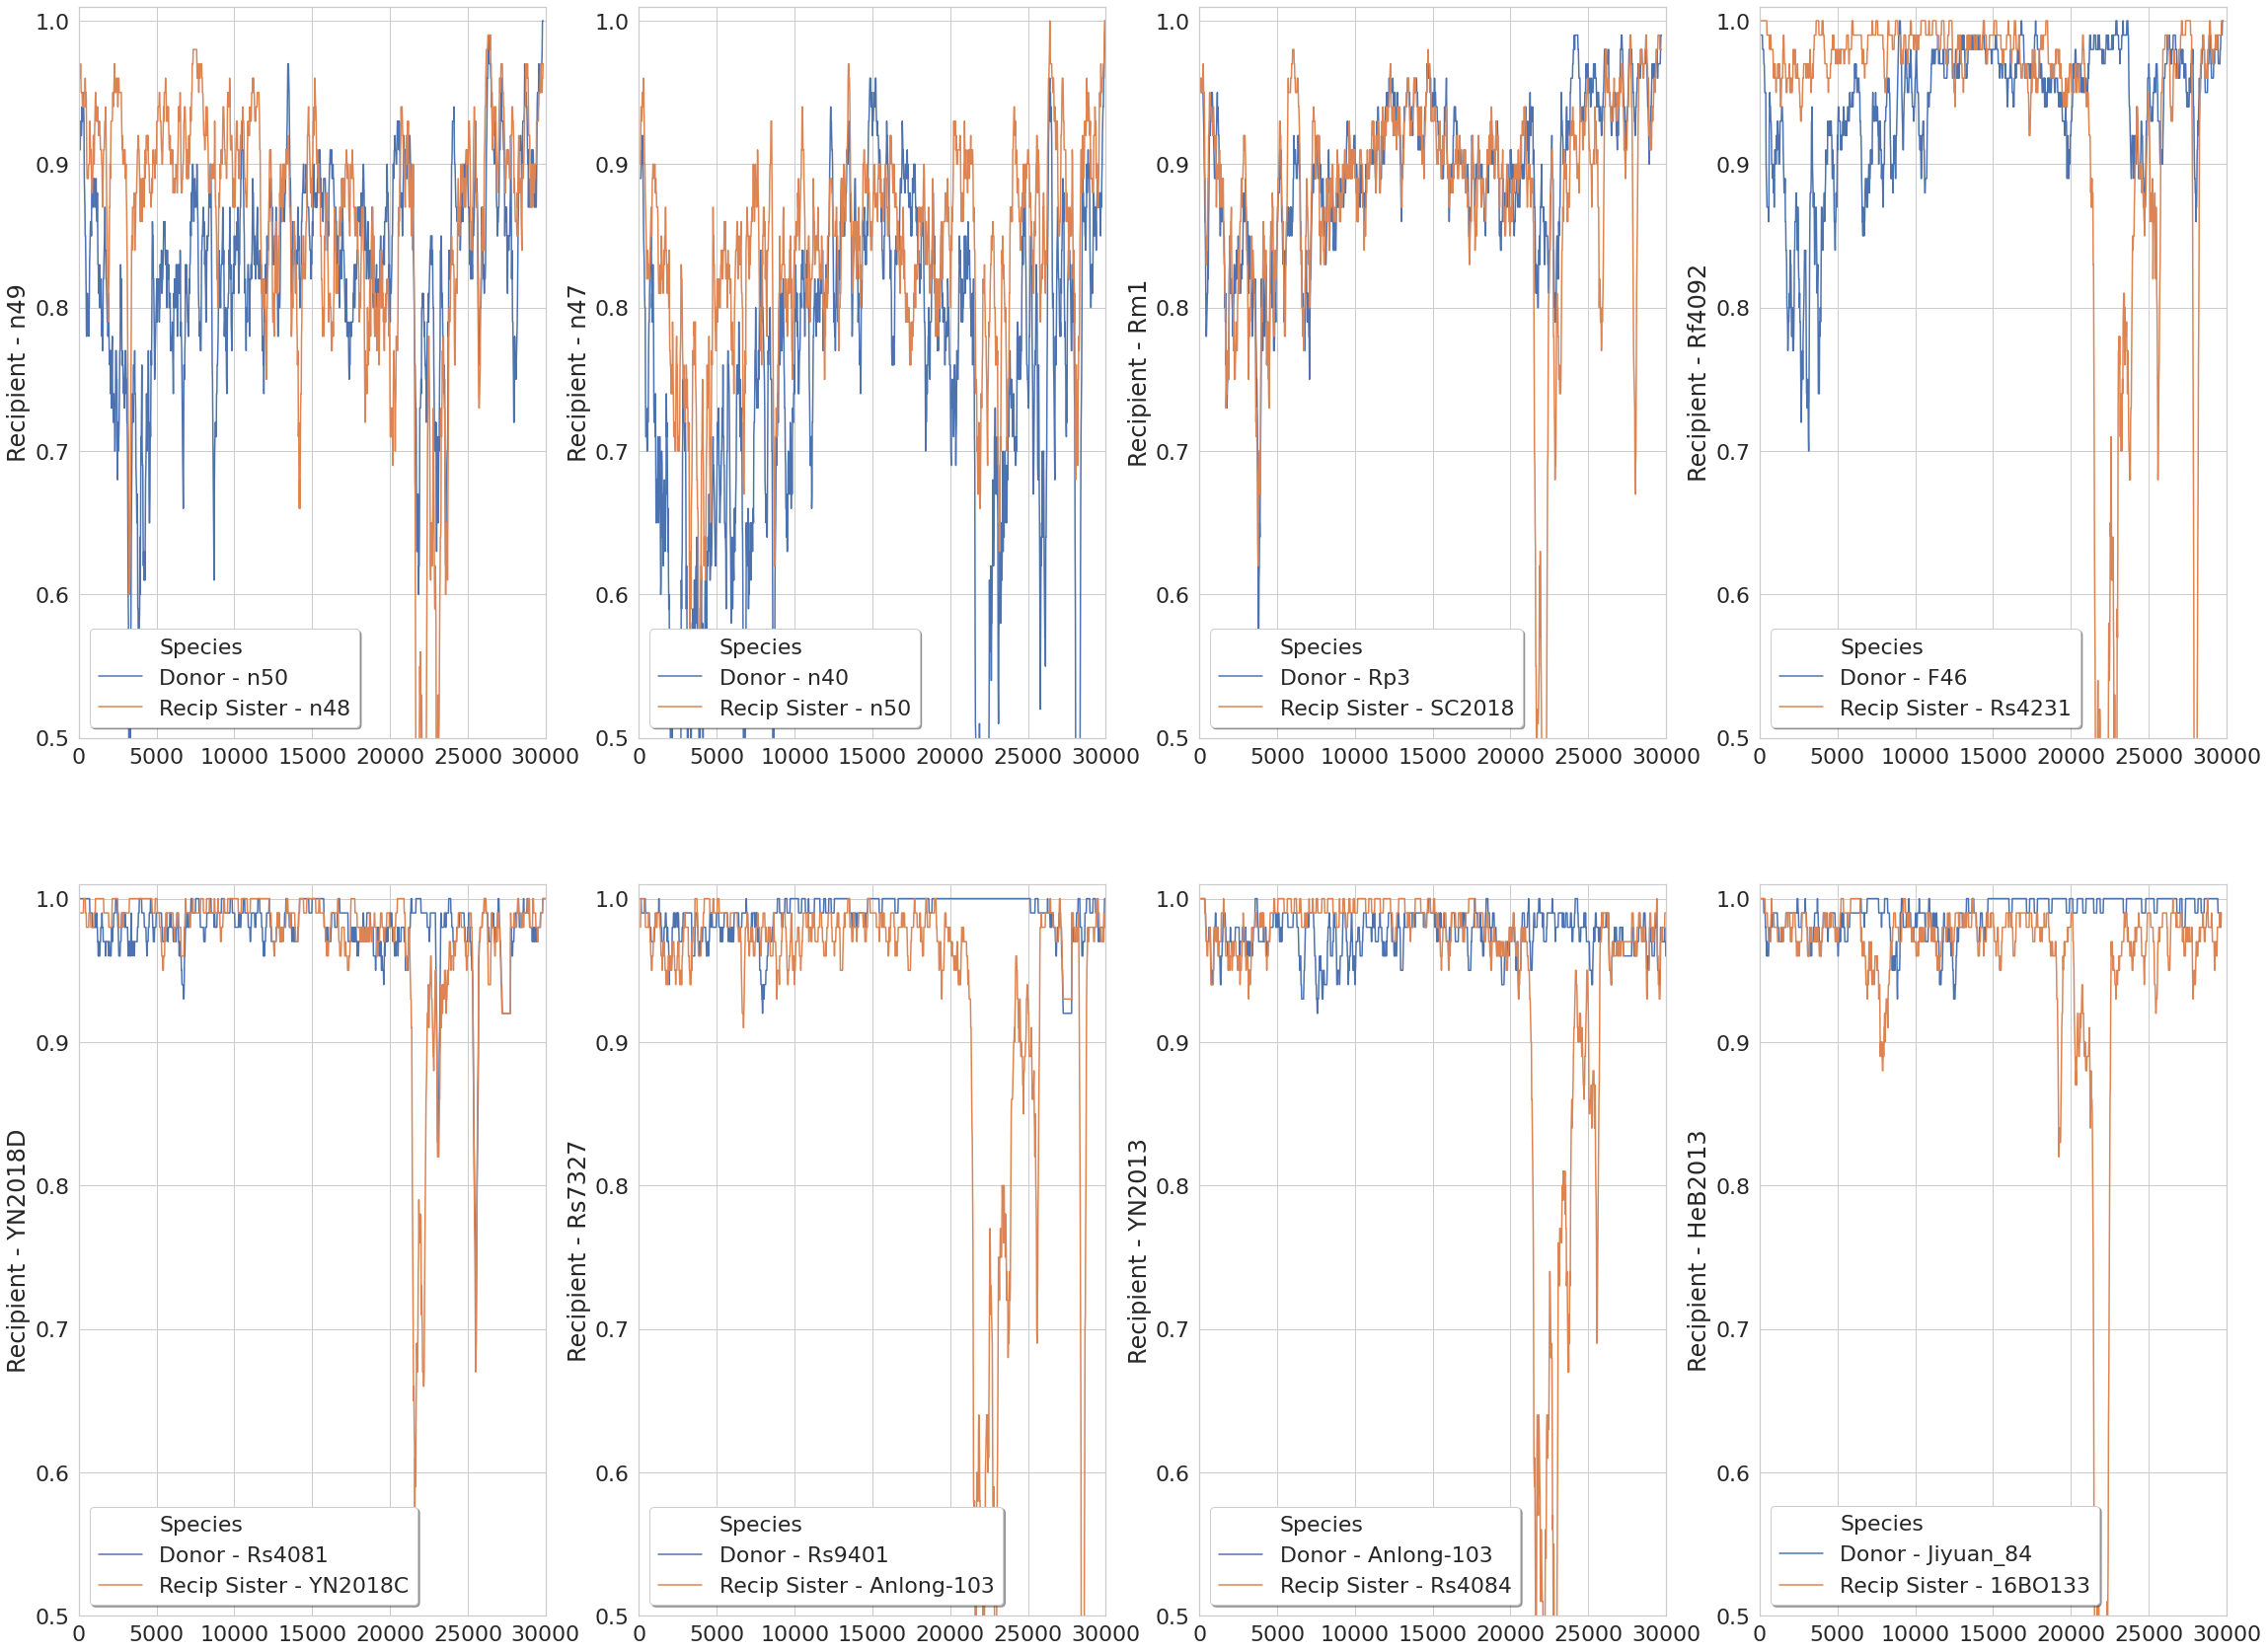

In [9]:
fig, ax = plt.subplots(2,4,figsize=(39,30))


for n, (don, rec, rec_sis) in triplets.iterrows():
    i = n // 4
    j = n % 4
    ax_ = ax[i][j]

    dat = dfs[(don, rec, rec_sis)]
    dat = dat.rename({don: f'Donor - {don}', rec_sis:f'Recip Sister - {rec_sis}'},axis=1)
    melted = pd.melt(dat, id_vars='Position', value_vars=dat[[f'Donor - {don}',f'Recip Sister - {rec_sis}']], value_name='Similarity', var_name='Group')
    melted.columns = ['Position','Species','Similarity']
    sns.lineplot(data=melted,x='Position',y='Similarity',hue='Species', ax = ax_)
    ax_.set_ylim(0.5,1.01)
    ax_.set_xlim(0,30001)
    ax_.set_xlabel('')
    ax_.set_ylabel(f"Recipient - {rec}")
    ax_.legend(loc='lower left',fancybox=True,shadow=True)

plt.savefig('supplementary_simplots.svg')
plt.show()